# Covid cases distributed by cities in Chile, a temporal and geographic analysis.
_By David Ávila Quezada_

In the next Jupyter notebook, a descriptive analysis of the COVID contagions in Chile is presented, through geographical graphics of the distribution of contagions over time. The document is distributed as follows:


0. [Load of necessary libraries](#Chapter0)
1. [Selection and preparation of the database and maps](#Chapter1)
2. [Exploratory analysis](#Chapter2)
3. [Relevant graphics](#Chapter3)
4. [Conclusions](#Chapter4)
5. [References](#Chapter5)


### TODO
- The jupyter notebook can be downloaded from jovian.ml, when downloading it you can update it with the last saved information (if I haven’t done it before, check the file version)
- If you are not familiarized with Python or with a programming language, you may be confused by the cells with code, to help you I marked them with ###THIS IS CODE###
- The used databases are the ones available in the github from the Chilean Ministry of Sciences, Technology and Knowledge. You can find them [here](https://github.com/MinCiencia/Datos-COVID19).
- The vector maps were obtained from the Library of the National Congress of Chile in [this address](https://www.bcn.cl/siit/mapas_vectoriales).
- The current version of this document is from 29.09.20, created for the [Data Analysis with Python: Zero to Pandas course](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas), , promoted by [Jovian.ml](https://jovian.ml/) and [freecodecamp](https://www.freecodecamp.org/)
- You are free to do whatever you want with this notebook.
- If you wish for help or orientation, you can communicate with me to [my email address](david.avila@uach.cl).
- I give my thanks to everyone working daily thinking and acting to release us from this pandemic.
- Long live free software, long live open knowledge!


In [4]:
###THIS IS CODE###
project_name = "covid-19_distribution_geographic_and_temporal"

In [22]:
###THIS IS CODE###
import sys

!pip install jovian --upgrade -q
!conda install --yes --prefix {sys.prefix} geopandas
!conda install --yes --prefix {sys.prefix} imageio
!conda install --yes --prefix {sys.prefix} descartes
!conda install --yes --prefix {sys.prefix} -c conda-forge wordcloud
!conda install --yes --prefix {sys.prefix} Pillow


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/nico/miniconda3/envs/stadis

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py37he5f6b98_2         151 KB  conda-forge
    wordcloud-1.8.0            |   py37h8f50634_0         190 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         341 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.8.0-py37h8f50634_0

The following packages will be UPDATED:

  certifi               pkgs/main::certif

In [6]:
###THIS IS CODE###
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "debaq/covid-19-distribution-geographic-and-temporal" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/debaq/covid-19-distribution-geographic-and-temporal


'https://jovian.ml/debaq/covid-19-distribution-geographic-and-temporal'

## 0. Librerias <span id="Chapter0"><span>


In [7]:
###THIS IS CODE###
%matplotlib inline

In [8]:
###THIS IS CODE###
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib import transforms
import matplotlib.gridspec as gridspec
from IPython.display import HTML
import requests
import io
plt.style.use('ggplot')

### 1. Selecci&#243;n y preparaci&#243;n de la base de datos y mapas <span id="Chapter1"><span>


TODO

In [278]:
###THIS IS CODE###
# Ref. del proceso : [1]
print("1.1  Databases are imported from the github")
url = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv"
url2 = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto25/CasosActualesPorComuna.csv"

download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
print("Columns in the Database:")
print(df.columns[:])

print("It can be observed that the selected database has the report dates since march 30, with a total of {} columnas".format(df.shape[0]) )
df.head()

1.1  Databases are imported from the github
Columns in the Database:
Index(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion',
       '2020-03-30', '2020-04-01', '2020-04-03', '2020-04-06', '2020-04-08',
       '2020-04-10', '2020-04-13', '2020-04-15', '2020-04-17', '2020-04-20',
       '2020-04-24', '2020-04-27', '2020-05-01', '2020-05-04', '2020-05-08',
       '2020-05-11', '2020-05-15', '2020-05-18', '2020-05-22', '2020-05-25',
       '2020-05-29', '2020-06-01', '2020-06-05', '2020-06-08', '2020-06-12',
       '2020-06-15', '2020-06-19', '2020-06-23', '2020-06-28', '2020-07-01',
       '2020-07-05', '2020-07-10', '2020-07-13', '2020-07-17', '2020-07-20',
       '2020-07-24', '2020-07-27', '2020-07-31', '2020-08-03', '2020-08-07',
       '2020-08-10', '2020-08-14', '2020-08-17', '2020-08-21', '2020-08-24',
       '2020-08-28', '2020-08-31', '2020-09-04', '2020-09-07', '2020-09-11',
       '2020-09-14', '2020-09-18', '2020-09-21', '2020-09-25', '2020-09-28',
       '20

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-09-11,2020-09-14,2020-09-18,2020-09-21,2020-09-25,2020-09-28,2020-10-02,2020-10-05,2020-10-09,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,7503.0,7646.0,7819.0,7948.0,8134.0,8332.0,8597.0,8772.0,8996.0,3634.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,26.0,26.0,26.0,27.0,27.0,27.0,27.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,63.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,59.0,60.0,62.0,62.0,63.0,67.0,67.0,70.0,70.0,2783.3
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,28.0,27.0,28.0,32.0,34.0,37.0,36.0,36.0,NaN


In [10]:
###THIS IS CODE###
print("### 1.2 Vector maps of the chilean cities are imported from the files *.shp")
comunasChile = gpd.read_file('Comunas/comunas.shp')
toponimosComunas = gpd.read_file('Toponimos/Toponimos.shp')
print(comunasChile.columns[:])

### 1.2 Vector maps of the chilean cities are imported from the files *.shp
Index(['objectid', 'shape_leng', 'dis_elec', 'cir_sena', 'cod_comuna',
       'codregion', 'st_area_sh', 'st_length_', 'Region', 'Comuna',
       'Provincia', 'geometry'],
      dtype='object')


In [247]:
###THIS IS CODE###
print("Both databases have the region and city codes, however they have different names. To put them together we will equate one and will use the function '.merge()'")
print("WARNING: when putting together both databases all the rows without city code are deleted, these columns exist because in the original database there is data without city information")

df.rename(columns={'Codigo comuna':'cod_comuna'}, inplace=True)

print("Now both databases have the ‘codcomuna’ columns, is time to put them together with .merge()")

comunasChilefix = comunasChile[['objectid', 'shape_leng', 'dis_elec', 'cir_sena', 'cod_comuna','st_area_sh', 'st_length_', 'geometry']]

combined_df = comunasChilefix.merge(df, on= "cod_comuna")

combined_df.head()



Both databases have the region and city codes, however they have different names. To put them together we will equate one and will use the function '.merge()'
Now both databases have the ‘codcomuna’ columns, is time to put them together with .merge()


,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,st_area_sh,st_length_,geometry,Region,Codigo region,...,2020-09-11,2020-09-14,2020-09-18,2020-09-21,2020-09-25,2020-09-28,2020-10-02,2020-10-05,2020-10-09,Tasa
0,48,170038.624165,16,8,6204,9.685774e+08,206184.271675,"POLYGON ((-7992818.789 -4056669.319, -7992731....",O’Higgins,6,...,39.0,42.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,589.6
1,29,125730.104795,15,8,6102,4.157446e+08,151911.576827,"POLYGON ((-7831651.813 -4022443.109, -7831596....",O’Higgins,6,...,308.0,313.0,324.0,331.0,337.0,343.0,347.0,350.0,356.0,2525.5
2,30,63026.084422,15,8,6103,1.448565e+08,76355.326122,"POLYGON ((-7892616.357 -4060673.364, -7892621....",O’Higgins,6,...,156.0,158.0,161.0,164.0,166.0,167.0,167.0,167.0,169.0,2158.1
3,31,89840.903562,15,8,6104,3.256572e+08,108874.623150,"POLYGON ((-7906457.717 -4051723.734, -7906266....",O’Higgins,6,...,400.0,409.0,428.0,434.0,437.0,443.0,453.0,455.0,465.0,2186.9
4,78,122626.493264,23,11,9121,6.990727e+08,156680.410681,"POLYGON ((-8121756.186 -4645860.295, -8121644....",Araucanía,9,...,43.0,46.0,48.0,53.0,62.0,66.0,71.0,74.0,80.0,648.2


1.5 Lets check if we can draw Chile with the database, for this we will use matplotlib and the geopandas library


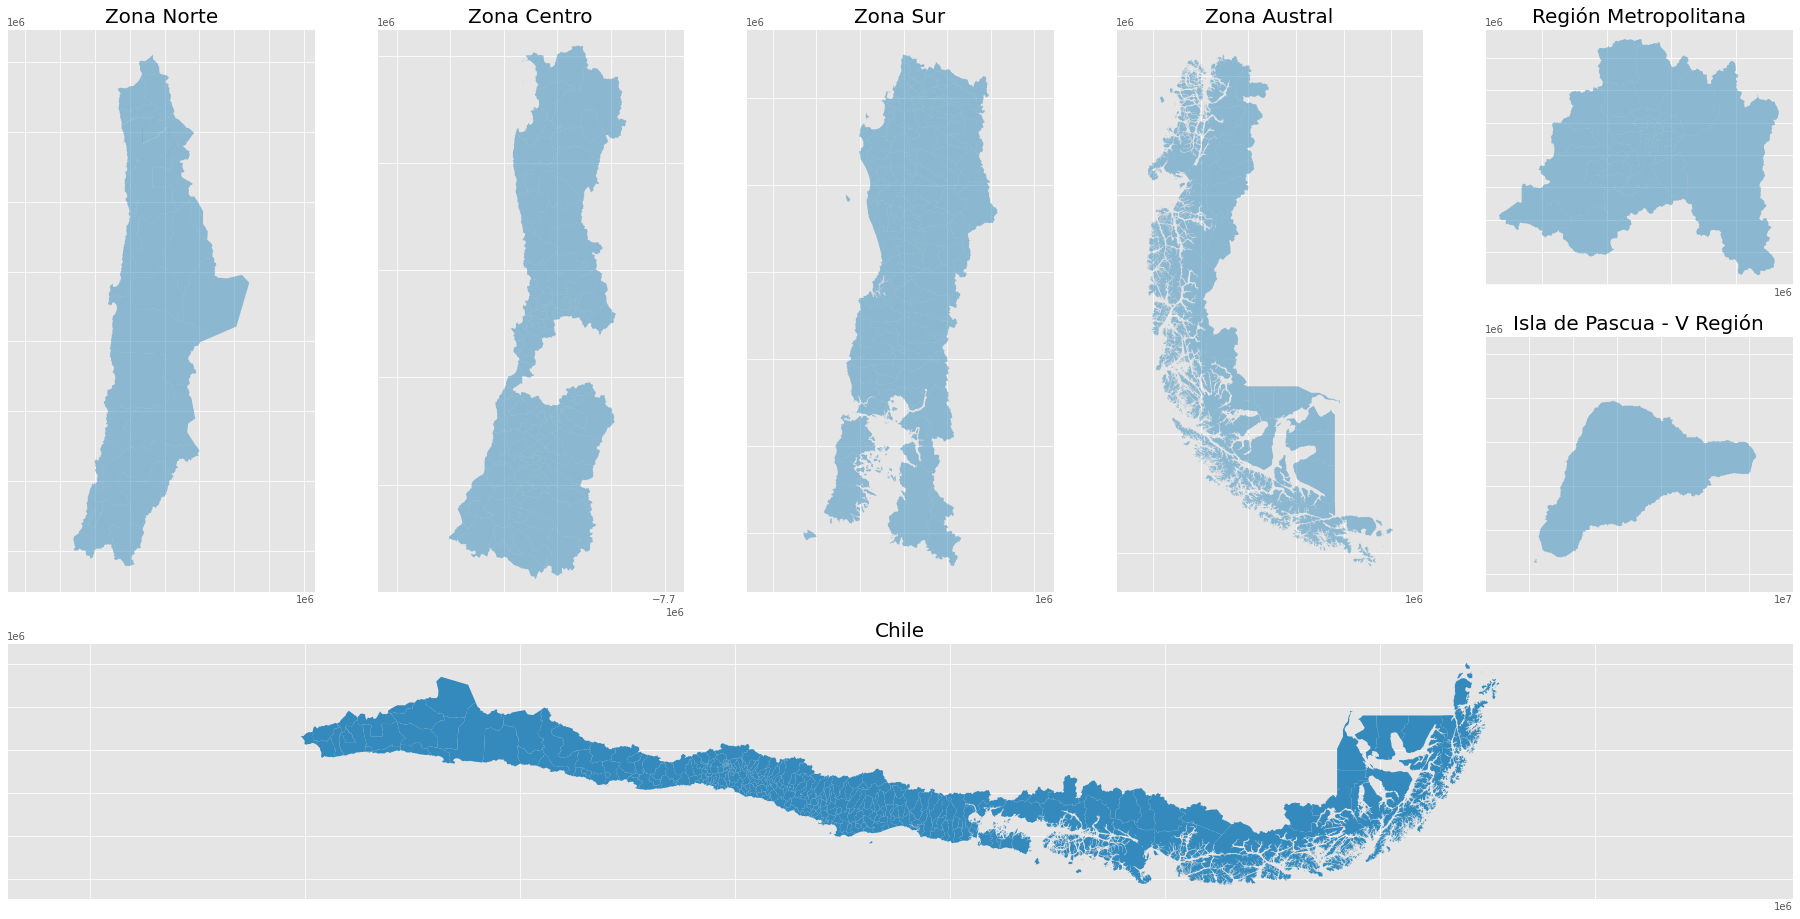

In [248]:
###THIS IS CODE###

print("1.5 Lets check if we can draw Chile with the database, for this we will use matplotlib and the geopandas library")

fig = plt.figure(figsize=(32,16))

spec = gridspec.GridSpec(ncols=5, nrows=3, figure=fig)

ax = [fig.add_subplot(spec[0:2, 0]),
      fig.add_subplot(spec[0:2, 1]),
      fig.add_subplot(spec[0:2, 2]),
      fig.add_subplot(spec[0:2, 3]),
      fig.add_subplot(spec[0, 4]),
      fig.add_subplot(spec[1, 4]),
      fig.add_subplot(spec[2, 0:])]

base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)

centroid = combined_df.copy()

centroid['geometry'] = combined_df['geometry'].centroid

Zones = {'Norte': [15,1,2,3],'Centro': [4,5,6,7],
         'Sur': [16,8,9,14,10],'Austral': [11,12],
         'Capital':[13],'IPascua':[5],
         "Chile":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]}

NamesZones = ["Zona Norte", "Zona Centro", "Zona Sur", "Zona Austral","Región Metropolitana","Isla de Pascua - V Región","Chile"]
  
zoneMaps = []

zoneCentroid = []

def reg_extract_map(n):
    outputReg = combined_df.copy().iloc[0:0]
    for i in n:
        outputReg = outputReg.append(combined_df.loc[combined_df['Codigo region'] == i], ignore_index = True)
    return outputReg

def reg_extract_centroid(n):
    outputReg = combined_df.copy().iloc[0:0]
    for i in n:
        outputReg = outputReg.append(centroid.loc[centroid['Codigo region'] == i], ignore_index = True)
    return outputReg

ax[1].set_xlim(-8150000,-7750000)
ax[1].set_ylim(-4400000, -3350000)
ax[5].set_ylim(-3150000,-3125000)
ax[5].set_xlim(-12190000, -12155000)
ax[-1].set_ylim(-8490000,  -7300000)



for key in Zones:
    zoneMaps.append(reg_extract_map(Zones[key]))
    zoneCentroid.append(reg_extract_centroid(Zones[key]))

for i in range(len(zoneMaps)-1):
    zoneMaps[i].plot(ax=ax[i],alpha=0.5)

zoneMaps[-1].plot(ax=ax[-1], transform= rot + base)


for i in range(len(ax)):
    ax[i].set_adjustable(adjustable='datalim', share=True)
    plt.setp(ax[i].get_xticklabels(), visible=False)
    plt.setp(ax[i].get_yticklabels(), visible=False)
    ax[i].tick_params(axis='both', which='both', length=0)
    ax[i].set_title(NamesZones[i], fontsize=20)
    

In [13]:
###THIS IS CODE###

jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "debaq/covid-19-distribution-geographic-and-temporal" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/debaq/covid-19-distribution-geographic-and-temporal


'https://jovian.ml/debaq/covid-19-distribution-geographic-and-temporal'

## Exploratory Analysis and Visualization  <span id="Chapter2"><span>

TODO
    A continuación se grafican cada una de las comunas en el mapa con una marca que establece la cantidad de pacientes acumulados que se han notificado a la fecha.
    Cada uno de los día notificados se guarda como imagen en la carpeta charts, para luego crear un gif animado o un mp4.

Text(0.5, 0.98, 'Casos Acumulados por comuna, en la última fecha : 2020-10-09')

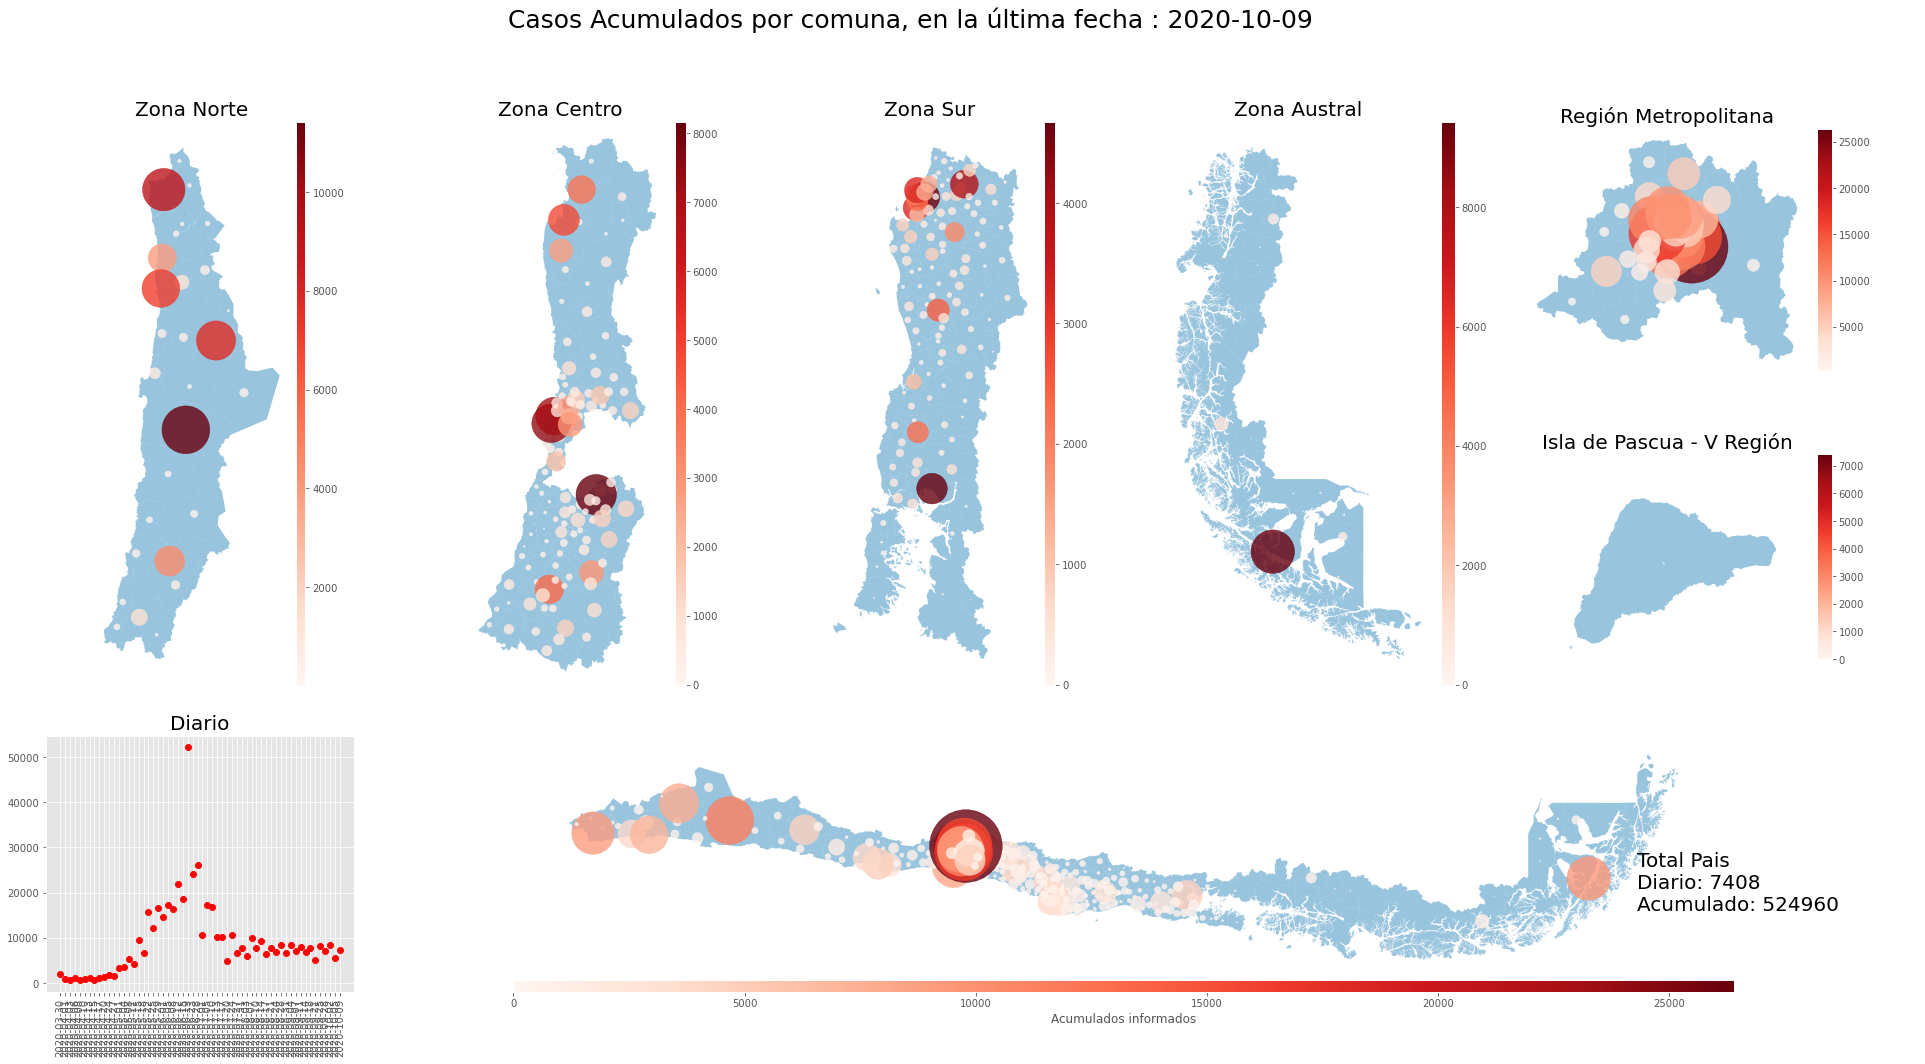

In [271]:
###THIS IS CODE###

import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

pob_Total = 18952038

#Variables
output_path = 'charts'

#Se extraen las fechas en las cuales se harpa la iteración
list_of_dates = df.columns.values.tolist()
list_remove = ['Region', 'Codigo region', 'Comuna', 'cod_comuna', 'Poblacion','Tasa']
for i in list_remove:
    list_of_dates.remove(i)
    
#Se crea el marco de matplotlib y sus caracteristicas
    
fig = plt.figure(figsize=(32,16))
spec = gridspec.GridSpec(ncols=5, nrows=3, figure=fig)
size_font = 20

#Funciones para crear listas
def cax_func(ax, pos="right", size="5%", pad=0.1):
    divider = make_axes_locatable(ax)
    ouput = divider.append_axes(pos, size=size, pad=pad)
    return ouput

def msize(zone, date, divisor=5):
    msize = zone[date]/divisor
    return msize

#Axis donde se dibujaran los graficos

ax = [fig.add_subplot(spec[0:2, 0]),
      fig.add_subplot(spec[0:2, 1]),
      fig.add_subplot(spec[0:2, 2]),
      fig.add_subplot(spec[0:2, 3]),
      fig.add_subplot(spec[0, 4]),
      fig.add_subplot(spec[1, 4]),
      fig.add_subplot(spec[2, 0:1]),
      fig.add_subplot(spec[2, 1:])]
    


totalDia_graph =[]
listDate_graph =[]
    
cax = []

base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)

for i in range(len(ax)):
    if i < (len(ax)-2):
        cax_i = cax_func(ax[i])
    elif i == len(ax)-1:
        cax_i = cax_func(ax[i], pos="bottom")
    else:
        pass
    cax.append(cax_i)
    
# start the for loop to create one map per day
count = 0
prev_date = 0
for date in list_of_dates:
    
    for i in range(len(ax)):
        ax[i].clear()
        cax[i].clear()
        if i < 6:
            ax[i].set_title(NamesZones[i], fontsize=20)
        if i == 6:
            ax[i].set_title("Diario", fontsize=20)
    
       
       
    ax[1].set_xlim(-8150000,-7750000)
    ax[1].set_ylim(-4400000, -3350000)
    ax[5].set_ylim(-3150000,-3125000)
    ax[5].set_xlim(-12190000, -12155000)
    ax[-1].set_ylim(-8490000,  -7300000)

    for i in range(len(zoneMaps)-1):
        zoneMaps[i].plot(ax=ax[i],alpha=0.5)
        zoneCentroid[i].plot(column=date, ax=ax[i], cmap='Reds', markersize=msize(zoneCentroid[i],date), alpha=0.8, legend=True, cax=cax[i])

    zoneMaps[-1].plot(ax=ax[-1], transform= rot + base, alpha=0.5)
    zoneCentroid[-1].plot(column=date, ax=ax[-1], cmap='Reds', markersize=msize(zoneCentroid[-1],date),transform= rot + base, alpha=0.8, legend=True, 
                         legend_kwds={'label': "Acumulados informados", 'orientation': "horizontal"}, cax=cax[-1])
    if prev_date == 0:
        totalDia = int(combined_df[date].sum())
    else:
        totalDia = int(combined_df[date].sum()) - int(combined_df[prev_date].sum())
    

   
    totalCountry = ("Total Pais\nDiario: "+str(totalDia)+"\nAcumulado: "+str(int(combined_df[date].sum())))
    
    ax[-1].annotate(totalCountry,xy=(0.85, 0.2), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top',fontsize=20)
    prev_date = date
    
    listDate_graph.append(date)
    totalDia_graph.append(totalDia)
    
    x = len(totalDia_graph)
    ax[6].plot(listDate_graph, totalDia_graph, "ro")
    ax[6].tick_params(axis='x', rotation=90)
    # add a title
    fig_Title = 'Casos reportados por comunas, acumulativo'+' '+str(date)
    fig.suptitle(fig_Title, fontsize=25)
     
    for i in range(len(ax)):
        if i != 6:
            ax[i].axis('off')
   
    # this will save the figure as a high-res jpg
    filepath = os.path.join(output_path, date+'.jpg')
    fig.savefig(filepath, dpi=100)
    #count = count +1
    #if count == 3 :
    #    break

fig_Title = 'Casos Acumulados por comuna, en la última fecha :'+' '+str(date)
fig.suptitle(fig_Title, fontsize=25) 

# Animated:

In [283]:
###THIS IS CODE###

import imageio
from IPython.display import HTML

#Lista para almacenar los nombres de todas las imagenes
images = []
#se cargan todas las imagenes que existan en la carpeta charts y tengan extención *.jpg
filenames = sorted((fn for fn in os.listdir(output_path) if fn.endswith('.jpg')))

for filename in filenames:
    images.append(imageio.imread(output_path+'/'+filename))

imageio.mimsave('accumulative_city.gif', images, fps=1)

# Se muestra la animación almacenada offline
#HTML('<img src="accumulative_city.gif">')
# Se muestra la animación almacenada online en Github
HTML('<img src="accumulative_city.gif">')

In [222]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "debaq/covid-19-distribution-geographic-and-temporal" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/debaq/covid-19-distribution-geographic-and-temporal


'https://jovian.ml/debaq/covid-19-distribution-geographic-and-temporal'

## Asking and Answering Questions  <span id="Chapter3"><span>

### TODO
#### Preguntas:
- [¿cuales son las 10 comunas con más notificaciónes acumuladas?](#Question1)
- [¿cual es el promedio de notificación diaria para el pais y para las 10 comunas con mayor notificación y para las 10 comunas con menor notificacion?](#Question2)
- [¿cuanto tiempo en promedio le toma a las comunas en tener](#Question3)
- [¿cual es el ](#Question4)
- [ccc](#Question5)

### Question 1  <span id="Question1"><span>


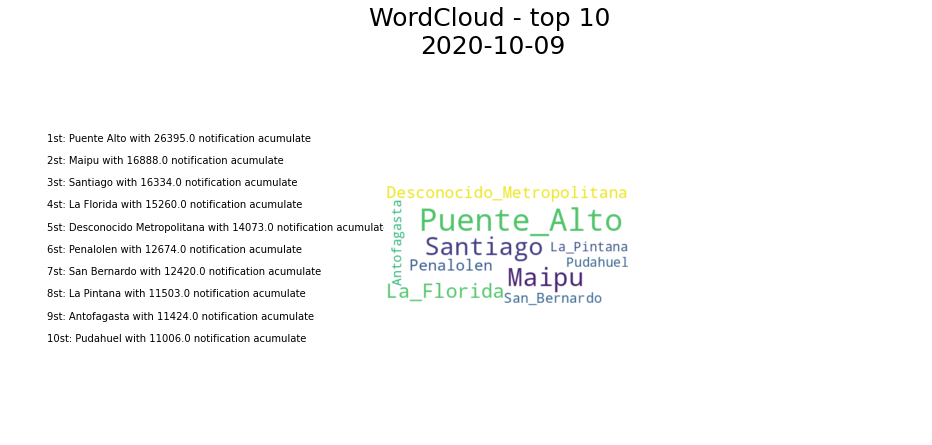

In [239]:
###THIS IS CODE###
#Ref. del proceso [3]
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig = plt.figure(figsize=(15,7))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

ax = [fig.add_subplot(spec[0, 0]),
      fig.add_subplot(spec[0, 1]),
      fig.add_subplot(spec[0, 2])]

word_path = "words"

count = 0
prev_date = 0

for date in list_of_dates:

    for i in range(len(ax)):
        ax[i].clear()
        #ax[i].set_title("Diario", fontsize=20)
        
    size_word = df[date]/10
    ten_More = df.sort_values(by=date, ascending=False).head(10)
    comunas_top10_name = ten_More.Comuna.values.tolist()
    comunas_top10_value = ten_More[date].values.tolist()
    comunas_top10 = []

    for i in range(len(comunas_top10_name)):
        output = [comunas_top10_name[i],comunas_top10_value[i]]
        comunas_top10.append(output)

    def listToString(s):  
        str1 = ""  
        for ele in s:
            ele = ele.replace(" ", "_")
            str1 += ele+", "   

        return str1  

    def create_list(palabra, multi):
        output = []
        for i in range(int(multi)):
            output.append(palabra)
        return output

    out_list = []
    for i in comunas_top10:
        lista = []
        lista.append(create_list(i[0],i[1]))
        for i in range(len(lista[0])):
            out_list.append(lista[0][i])

    text = listToString(out_list) 
    wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white", relative_scaling=.5, collocations=False).generate(text)

    for i in range(len(comunas_top10)):
        table_review = str(i+1)+"st: {} with {} notification acumulate".format(comunas_top10[i][0],comunas_top10[i][1])
        y = 0.7 - i/20
        ax[0].annotate(table_review,xy=(0.05, y), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top',fontsize=10)

    ax[1].imshow(wordcloud, interpolation="bilinear")

    # add a title
    fig_Title = 'WordCloud - top 10 \n'+str(date)
    fig.suptitle(fig_Title, fontsize=25)
    
    for i in ax:
        i.axis("off")
    
    filepath = os.path.join(word_path, date+'.jpg')
    fig.savefig(filepath)
    #count = count +1
    #if count == 3 :
    #    break


# Animation :

In [241]:
###THIS IS CODE###

import imageio
from IPython.display import HTML

#Lista para almacenar los nombres de todas las imagenes
images = []
#se cargan todas las imagenes que existan en la carpeta charts y tengan extención *.jpg
filenames = sorted((fn for fn in os.listdir(output_path) if fn.endswith('.jpg')))

for filename in filenames:
    images.append(imageio.imread(word_path+'/'+filename))

imageio.mimsave('wordCloud.gif', images, fps=0.8)

# Se muestra la animación almacenada offline
#HTML('<img src="accumulative_city.gif">')
# Se muestra la animación almacenada online en Github
HTML('<img src="wordCloud.gif">')

### Question 2  <span id="Cuestion"><span>
    

In [267]:
###THIS IS CODE###

#Se extraen las fechas en las cuales se harpa la iteración
list_of_dates = df.copy()
list_remove = ['Region', 'Codigo region', 'cod_comuna', 'Poblacion','Tasa']
list_of_dates_r = list_of_dates.drop(columns=list_remove)
list_of_dates_r.sort_values(by="2020-04-01", ascending=False).head(10)


,Comuna,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,...,2020-09-07,2020-09-11,2020-09-14,2020-09-18,2020-09-21,2020-09-25,2020-09-28,2020-10-02,2020-10-05,2020-10-09
287,Temuco,154.0,225.0,293.0,365.0,407.0,443.0,471.0,506.0,547.0,...,1504.0,1561.0,1616.0,1696.0,1751.0,1890.0,1998.0,2138.0,2289.0,2467.0
108,Las Condes,181.0,208.0,224.0,258.0,266.0,281.0,296.0,306.0,320.0,...,6255.0,6307.0,6365.0,6441.0,6473.0,6566.0,6626.0,6716.0,6776.0,6928.0
207,Chillan,114.0,173.0,240.0,291.0,327.0,342.0,355.0,373.0,387.0,...,2833.0,3017.0,3151.0,3336.0,3425.0,3553.0,3645.0,3746.0,3781.0,3864.0
136,Santiago,127.0,156.0,173.0,234.0,271.0,321.0,375.0,404.0,463.0,...,15604.0,15720.0,15791.0,15880.0,15916.0,16006.0,16083.0,16202.0,16269.0,16334.0
323,Osorno,66.0,120.0,163.0,190.0,207.0,220.0,232.0,241.0,249.0,...,1351.0,1390.0,1410.0,1482.0,1573.0,1683.0,1822.0,1970.0,2092.0,2239.0
139,Vitacura,83.0,90.0,100.0,114.0,114.0,119.0,127.0,128.0,130.0,...,1634.0,1652.0,1662.0,1677.0,1679.0,1712.0,1722.0,1729.0,1742.0,1760.0
356,Punta Arenas,29.0,87.0,143.0,203.0,207.0,299.0,387.0,416.0,470.0,...,4421.0,4747.0,5257.0,5770.0,6312.0,6961.0,7537.0,8139.0,8695.0,9431.0
123,Providencia,82.0,87.0,94.0,104.0,115.0,129.0,136.0,147.0,164.0,...,3421.0,3439.0,3454.0,3479.0,3489.0,3521.0,3540.0,3584.0,3602.0,3629.0
116,Nunoa,67.0,84.0,93.0,107.0,118.0,155.0,171.0,188.0,217.0,...,5850.0,5913.0,5957.0,6004.0,6043.0,6079.0,6120.0,6155.0,6170.0,6220.0
109,Lo Barnechea,68.0,78.0,85.0,97.0,105.0,110.0,116.0,125.0,144.0,...,3594.0,3610.0,3630.0,3646.0,3652.0,3674.0,3698.0,3739.0,3749.0,3781.0


In [275]:
#combined_df['tests_per_million'] = combined_df['total_tests'] * 1e6 / combined_df['population']
df_daily = pd.DataFrame()

for date in range(len(list_of_dates)):
    if date == 0 :
            df_daily[list_of_dates[date]] = list_of_dates_r[list_of_dates[date]]
    else:
        df_daily[list_of_dates[date]] = list_of_dates_r[list_of_dates[date]] - list_of_dates_r[list_of_dates[date-1]]

df_daily.sum()


2020-03-30     1937.0
2020-04-01      876.0
2020-04-03      698.0
2020-04-06     1071.0
2020-04-08      708.0
2020-04-10      982.0
2020-04-13     1205.0
2020-04-15      683.0
2020-04-17     1060.0
2020-04-20     1222.0
2020-04-24     1764.0
2020-04-27     1494.0
2020-05-01     3274.0
2020-05-04     3566.0
2020-05-08     5386.0
2020-05-11     4095.0
2020-05-15     9462.0
2020-05-18     6535.0
2020-05-22    15799.0
2020-05-25    12144.0
2020-05-29    16640.0
2020-06-01    14521.0
2020-06-05    17337.0
2020-06-08    16345.0
2020-06-12    21999.0
2020-06-15    18590.0
2020-06-19    52120.0
2020-06-23    24710.0
2020-06-28    25389.0
2020-07-01    12031.0
2020-07-05    17103.0
2020-07-10    16587.0
2020-07-13    10021.0
2020-07-17     9901.0
2020-07-20     4726.0
2020-07-24     9904.0
2020-07-27     6386.0
2020-07-31     7649.0
2020-08-03     5892.0
2020-08-07     9726.0
2020-08-10     7327.0
2020-08-14     8898.0
2020-08-17     6224.0
2020-08-21     7504.0
2020-08-24     6703.0
2020-08-28

In [264]:
print("Descripción de datos a nivel nacional")
list_of_dates_r.describe()

Descripción de datos a nivel nacional


,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,...,2020-09-07,2020-09-11,2020-09-14,2020-09-18,2020-09-21,2020-09-25,2020-09-28,2020-10-02,2020-10-05,2020-10-09
count,343.000000,346.000000,346.00000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,...,362.000000,362.000000,362.000000,362.000000,362.00000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,5.647230,8.141618,10.15896,13.254335,15.300578,18.138728,21.621387,23.595376,26.658960,30.190751,...,1318.651934,1340.395028,1359.337017,1380.629834,1394.69337,1416.878453,1436.215470,1459.022099,1474.604972,1494.475138
std,19.022787,25.224560,31.03781,38.455380,42.803249,49.523508,56.388132,61.195845,68.931845,76.532638,...,2883.787778,2909.046063,2929.002841,2953.096380,2968.16903,2991.461413,3012.614236,3038.469200,3055.456406,3077.649808
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,70.500000,74.000000,74.750000,77.250000,80.25000,81.750000,86.000000,95.750000,102.250000,99.500000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,4.000000,...,205.000000,214.000000,217.000000,225.000000,229.00000,246.000000,257.000000,271.500000,285.500000,302.000000
75%,0.000000,5.000000,6.75000,9.000000,11.000000,12.000000,14.000000,14.750000,15.750000,18.750000,...,759.000000,779.500000,825.250000,848.500000,880.75000,918.750000,952.000000,971.250000,1010.500000,1021.500000
max,181.000000,225.000000,293.00000,365.000000,407.000000,443.000000,471.000000,506.000000,547.000000,605.000000,...,24873.000000,25110.000000,25297.000000,25498.000000,25575.00000,25779.000000,25926.000000,26122.000000,26243.000000,26395.000000


### Question 3   <span id="Question3"><span>


### Question 4  <span id="Question4"><span>


### Question 5  <span id="Question5"><span>


In [269]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "debaq/covid-19-distribution-geographic-and-temporal" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/debaq/covid-19-distribution-geographic-and-temporal


'https://jovian.ml/debaq/covid-19-distribution-geographic-and-temporal'

## Inferences and Conclusion  <span id="Chapter4"><span>

TODO

In [11]:
import jovian

In [12]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work  <span id="Chapter5"><span>

TODO

1. [Loading a csv file from GitHub in Python, by Thomas Le Menestrel](https://medium.com/towards-entrepreneurship/importing-a-csv-file-from-github-in-a-jupyter-notebook-e2c28e7e74a5)
2. [Markdown in python with Ipython, by Charles](https://stackoverflow.com/a/46934204)
3. [Word-Cloud, by Duong Vu](https://www.datacamp.com/community/tutorials/wordcloud-python)

In [38]:
import jovian

In [126]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "debaq/covid-19-distribution-geographic-and-temporal" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/debaq/covid-19-distribution-geographic-and-temporal


'https://jovian.ml/debaq/covid-19-distribution-geographic-and-temporal'